# Introduction to ANN implementations using Keras

In [173]:
from keras.datasets import fashion_mnist

## "Hello World 2" of deep learning: MNIST Fashion Dataset



[Fashion MNIST dataset](https://keras.io/api/datasets/fashion_mnist/)

| Label | Description |
|:-----:|:-----------:|
|   0   | T-shirt/top |
|   1   | Trouser     |
|   2   | Pullover    |
|   3   | Dress       |
|   4   | Coat        |
|   5   | Sandal      |
|   6   | Shirt       |
|   7   | Sneaker     |
|   8   | Bag         |
|   9   | Ankle boot  |

In [174]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train, x_test = x_train / 255., x_test / 255.

In [175]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

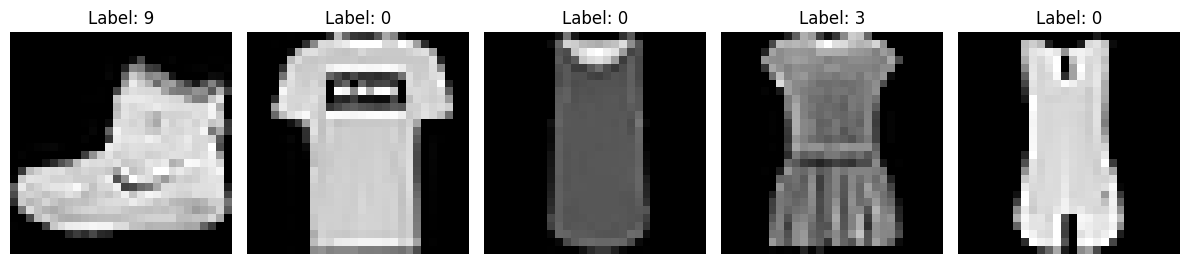

In [176]:
import matplotlib.pyplot as plt

# Create a figure and axes objects
num_examples = 5
fig, axs = plt.subplots(1, num_examples, figsize=(12, 4))

# Plot examples
for i in range(num_examples):
    axs[i].imshow(x_train[i], cmap='gray')
    axs[i].set_title('Label: {}'.format(y_train[i]))
    axs[i].axis('off')

# Adjust layout
plt.tight_layout()
plt.show()

## Neural Network

### Import Required Libraries

In [177]:
import numpy as np
from sklearn.metrics import classification_report

import keras
from keras import layers, activations

### Covert "Sparse Categorical" to "Categorical
to be explored

In [178]:
# y_train = keras.utils.to_categorical(y_train)
# y_test = keras.utils.to_categorical(y_test)

### Define and build an ANN
Using `Sequential` class; alternative approach in another notebook

To do
1.   Convert to logistic regression
2.   Two ways of specifying activations
3. Show documentation for activation

In [179]:
# convert this into a logistic regression problem
model = keras.Sequential()
model.add(layers.Flatten())
model.add(layers.Dense(64, activation="relu"))
model.add(layers.Dense(10, activation=activations.softmax))


### Model Compilation
Specify:
1. loss
2. optimizer
3. metrics

Modification:
1. Convert form "Sparse Categorical" to "Categorical" classification task



In [180]:
model.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=keras.optimizers.RMSprop(),
    metrics=[keras.metrics.SparseCategoricalAccuracy()], # "accuracy" -> can be used instead
)

### Model Training

In [181]:
history = model.fit(x_train, y_train, batch_size=64, epochs=3, validation_split=0.2)

Epoch 1/3


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


750/750 [==============================] - 3s 3ms/step - loss: 0.5771 - sparse_categorical_accuracy: 0.7979 - val_loss: 0.4284 - val_sparse_categorical_accuracy: 0.8483
Epoch 2/3
750/750 [==============================] - 2s 3ms/step - loss: 0.4172 - sparse_categorical_accuracy: 0.8531 - val_loss: 0.4107 - val_sparse_categorical_accuracy: 0.8534
Epoch 3/3
750/750 [==============================] - 2s 3ms/step - loss: 0.3746 - sparse_categorical_accuracy: 0.8660 - val_loss: 0.4039 - val_sparse_categorical_accuracy: 0.8563


In [182]:
model.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_15 (Flatten)        (None, 784)               0         
                                                                 
 dense_25 (Dense)            (None, 64)                50240     
                                                                 
 dense_26 (Dense)            (None, 10)                650       
                                                                 
Total params: 50890 (198.79 KB)
Trainable params: 50890 (198.79 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### Model Evaluation

In [183]:
yhat_test = np.argmax(model.predict(x_test), axis=1)

313/313 [==============================] - 1s 2ms/step


In [184]:
classification_report(y_test, yhat_test, output_dict=True)

{'0': {'precision': 0.787962962962963,
  'recall': 0.851,
  'f1-score': 0.8182692307692307,
  'support': 1000},
 '1': {'precision': 0.9876288659793815,
  'recall': 0.958,
  'f1-score': 0.9725888324873097,
  'support': 1000},
 '2': {'precision': 0.8615160349854227,
  'recall': 0.591,
  'f1-score': 0.701067615658363,
  'support': 1000},
 '3': {'precision': 0.919526627218935,
  'recall': 0.777,
  'f1-score': 0.8422764227642277,
  'support': 1000},
 '4': {'precision': 0.5990932642487047,
  'recall': 0.925,
  'f1-score': 0.7272012578616351,
  'support': 1000},
 '5': {'precision': 0.9634888438133874,
  'recall': 0.95,
  'f1-score': 0.9566968781470292,
  'support': 1000},
 '6': {'precision': 0.6710526315789473,
  'recall': 0.561,
  'f1-score': 0.6111111111111113,
  'support': 1000},
 '7': {'precision': 0.9228515625,
  'recall': 0.945,
  'f1-score': 0.9337944664031621,
  'support': 1000},
 '8': {'precision': 0.9373795761078998,
  'recall': 0.973,
  'f1-score': 0.9548577036310107,
  'support': 